## Final Project - Machine Learning Models

#### In this file I will run three machine learning models to every database cleaned and will evaluate the results of these different models.

1. I download the libraries that I will use

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2. MLM

### MLM with data1

data1 has these characteristics:
1. NaNs are removed.
2. Outliers are removed.
3. 'Year' variable is removed.

In [2]:
data1 = pd.read_csv('../Data/cleaned/Data1.csv')
display(data1)

,country,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,Zimbabwe,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1440,Zimbabwe,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1441,Zimbabwe,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1442,Zimbabwe,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [4]:
X = data1.drop(['life_expectancy'],axis=1)
y = data1['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat= X_train.select_dtypes(object)
X_test_cat= X_test.select_dtypes(object)

#Numericals
scaler = StandardScaler()
scaler.fit(X_train_num)

# Save the scaler into the "scalers/" folder with pickle
filename = "../Scalers/standard_scaler1.pkl"
with open(filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)
X_test_scaled_df  = pd.DataFrame(X_test_num_scaled, columns = X_train_num.columns)

#Categoricals
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

X_train_df = pd.concat([X_train_scaled_df, X_train_cat_encoded_df],axis=1)
X_test_df = pd.concat([X_test_scaled_df, X_test_cat_encoded_df],axis=1)

X_train_df = pd.DataFrame(X_train_df, index=X_train_df.index)
X_test_df  = pd.DataFrame(X_test_df, index=X_test_df.index)

In [5]:
def error_metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mape = (abs((y - y_pred) / y)).mean() * 100
    r2 = r2_score(y, y_pred)

    error_metrics_df = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })
    return error_metrics_df

# Fitting all models within the given list.
def train_models(models, X_train_df, y_train):
    for model, model_name in models:
        model.fit(X_train_df, y_train)
        # Save models
        filename = "../Models/" + model_name + ".pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)
    return models

# Create list of models and train them
models = [(LinearRegression(),'Linear Regression1'), 
           (KNeighborsRegressor(),'K-NN1'),
           (RandomForestRegressor(random_state=42),'Random Forest1')]
models = train_models(models, X_train_df, y_train)

# Do predictions for all models in list and evaluate thair performance.
for model, model_name in models:
    y_pred_train = model.predict(X_train_df)
    y_pred_test  = model.predict(X_test_df)

    train_metric = error_metrics(y_train, y_pred_train)
    test_metric  = error_metrics(y_test, y_pred_test)

    print("Train results for model {}".format(model_name))
    display(train_metric)    

    print("Test results for model {}".format(model_name))
    display(test_metric)    

Train results for model Linear Regression1


,Error_metric,Value
0,MAE,1.004586
1,MSE,2.471652
2,RMSE,1.572149
3,MAPE,1.460308
4,R2,0.964870


Test results for model Linear Regression1


,Error_metric,Value
0,MAE,1.116172
1,MSE,3.063662
2,RMSE,1.750332
3,MAPE,1.661383
4,R2,0.954400


Train results for model K-NN1


,Error_metric,Value
0,MAE,1.463525
1,MSE,5.340573
2,RMSE,2.310968
3,MAPE,2.187338
4,R2,0.924094


Test results for model K-NN1


,Error_metric,Value
0,MAE,1.908894
1,MSE,8.323232
2,RMSE,2.885001
3,MAPE,2.882901
4,R2,0.876117


Train results for model Random Forest1


,Error_metric,Value
0,MAE,0.425889
1,MSE,0.500727
2,RMSE,0.707620
3,MAPE,0.631764
4,R2,0.992883


Test results for model Random Forest1


,Error_metric,Value
0,MAE,1.163051
1,MSE,3.688910
2,RMSE,1.920653
3,MAPE,1.740829
4,R2,0.945094


### MLM with data2

data2 has these characteristics:

1. NaNs are treated with KNN.
2. Outliers are removed.
3. Countries are transformed into an ordinal categorical variable.

In [6]:
data2 = pd.read_csv('../Data/cleaned/Data2.csv')
display(data2)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,country_rank,country,status
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.261995,Afghanistan,Developing
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.261995,Afghanistan,Developing
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1.261995,Afghanistan,Developing
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.261995,Afghanistan,Developing
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.261995,Afghanistan,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,62.2,247.0,42.0,0.06,0.000000,43.0,12708.0,33.3,56.0,72.0,...,0.1,895.016624,76920800.6,13.9,13.9,0.464,8.4,1.384928,Yemen,Developing
2646,61.9,249.0,43.0,0.04,0.000000,38.0,8536.0,32.7,58.0,61.0,...,0.1,769.381712,9337280.6,14.0,13.9,0.457,8.2,1.384928,Yemen,Developing
2647,61.5,25.0,45.0,0.07,0.000000,31.0,890.0,32.2,61.0,64.0,...,0.1,808.264285,19281008.2,14.0,14.0,0.450,8.0,1.384928,Yemen,Developing
2648,61.1,251.0,46.0,0.08,0.000000,19.0,485.0,31.7,63.0,73.0,...,0.1,860.356336,14617579.6,14.0,14.0,0.444,7.9,1.384928,Yemen,Developing


In [7]:
X = data2.drop(['life_expectancy', 'country'],axis=1)
y = data2['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat= X_train.select_dtypes(object)
X_test_cat= X_test.select_dtypes(object)

#Numericals
scaler = StandardScaler()
scaler.fit(X_train_num)

# Save the scaler into the "scalers/" folder with pickle
filename = "../Scalers/standard_scaler2.pkl"
with open(filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)
X_test_scaled_df  = pd.DataFrame(X_test_num_scaled, columns = X_train_num.columns)

#Categoricals
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

X_train_df = pd.concat([X_train_scaled_df, X_train_cat_encoded_df],axis=1)
X_test_df = pd.concat([X_test_scaled_df, X_test_cat_encoded_df],axis=1)

X_train_df = pd.DataFrame(X_train_df, index=X_train_df.index)
X_test_df  = pd.DataFrame(X_test_df, index=X_test_df.index)

In [8]:
def error_metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mape = (abs((y - y_pred) / y)).mean() * 100
    r2 = r2_score(y, y_pred)

    error_metrics_df = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })
    return error_metrics_df

# Fitting all models within the given list.
def train_models(models, X_train_df, y_train):
    for model, model_name in models:
        model.fit(X_train_df, y_train)
        # Save models
        filename = "../Models/" + model_name + ".pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)
    return models

# Create list of models and train them
models = [(LinearRegression(),'Linear Regression2'), 
           (KNeighborsRegressor(),'K-NN2'),
           (RandomForestRegressor(random_state=42),'Random Forest2')]
models = train_models(models, X_train_df, y_train)

# Do predictions for all models in list and evaluate thair performance.
for model, model_name in models:
    y_pred_train = model.predict(X_train_df)
    y_pred_test  = model.predict(X_test_df)

    train_metric = error_metrics(y_train, y_pred_train)
    test_metric  = error_metrics(y_test, y_pred_test)

    print("Train results for model {}".format(model_name))
    display(train_metric)    

    print("Test results for model {}".format(model_name))
    display(test_metric)    

Train results for model Linear Regression2


,Error_metric,Value
0,MAE,1.513051
1,MSE,4.869570
2,RMSE,2.206710
3,MAPE,2.177424
4,R2,0.920414


Test results for model Linear Regression2


,Error_metric,Value
0,MAE,1.463497
1,MSE,4.483648
2,RMSE,2.117463
3,MAPE,2.148486
4,R2,0.925795


Train results for model K-NN2


,Error_metric,Value
0,MAE,1.308671
1,MSE,3.909279
2,RMSE,1.977190
3,MAPE,1.883528
4,R2,0.936109


Test results for model K-NN2


,Error_metric,Value
0,MAE,1.643532
1,MSE,5.183474
2,RMSE,2.276724
3,MAPE,2.377583
4,R2,0.914213


Train results for model Random Forest2


,Error_metric,Value
0,MAE,0.369175
1,MSE,0.396680
2,RMSE,0.629826
3,MAPE,0.528828
4,R2,0.993517


Test results for model Random Forest2


,Error_metric,Value
0,MAE,1.043372
1,MSE,2.696802
2,RMSE,1.642194
3,MAPE,1.511606
4,R2,0.955368


### MLM with data3

data3 has these characteristics:

1. NaNs are removed.
2. Outliers are NOT removed.
3. Countries are transformed into an ordinal categorical variable.

In [9]:
data3 = pd.read_csv('../Data/cleaned/Data3.csv')
display(data3)

,country,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness__1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,country_rank
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.261995
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.261995
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1.261995
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.261995
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.261995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,1.094877
1645,Zimbabwe,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,1.094877
1646,Zimbabwe,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,1.094877
1647,Zimbabwe,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,1.094877


In [10]:
X = data3.drop(['life_expectancy', 'country'],axis=1)
y = data3['life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat= X_train.select_dtypes(object)
X_test_cat= X_test.select_dtypes(object)

#Numericals
scaler = StandardScaler()
scaler.fit(X_train_num)

# Save the scaler into the "scalers/" folder with pickle
filename = "../Scalers/standard_scaler3.pkl"
with open(filename, "wb") as file:
    pickle.dump(scaler, file)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled  = scaler.transform(X_test_num)

X_train_scaled_df = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)
X_test_scaled_df  = pd.DataFrame(X_test_num_scaled, columns = X_train_num.columns)

#Categoricals
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

X_train_df = pd.concat([X_train_scaled_df, X_train_cat_encoded_df],axis=1)
X_test_df = pd.concat([X_test_scaled_df, X_test_cat_encoded_df],axis=1)

X_train_df = pd.DataFrame(X_train_df, index=X_train_df.index)
X_test_df  = pd.DataFrame(X_test_df, index=X_test_df.index)

In [11]:
def error_metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mape = (abs((y - y_pred) / y)).mean() * 100
    r2 = r2_score(y, y_pred)

    error_metrics_df = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })
    return error_metrics_df

# Fitting all models within the given list.
def train_models(models, X_train_df, y_train):
    for model, model_name in models:
        model.fit(X_train_df, y_train)
        # Save models
        filename = "../Models/" + model_name + ".pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)
    return models

# Create list of models and train them
models = [(LinearRegression(),'Linear Regression3'), 
           (KNeighborsRegressor(),'K-NN3'),
           (RandomForestRegressor(random_state=42),'Random Forest3')]
models = train_models(models, X_train_df, y_train)

# Do predictions for all models in list and evaluate thair performance.
for model, model_name in models:
    y_pred_train = model.predict(X_train_df)
    y_pred_test  = model.predict(X_test_df)

    train_metric = error_metrics(y_train, y_pred_train)
    test_metric  = error_metrics(y_test, y_pred_test)

    print("Train results for model {}".format(model_name))
    display(train_metric)    

    print("Test results for model {}".format(model_name))
    display(test_metric)    

Train results for model Linear Regression3


,Error_metric,Value
0,MAE,1.391087
1,MSE,4.012058
2,RMSE,2.003012
3,MAPE,2.055724
4,R2,0.948065


Test results for model Linear Regression3


,Error_metric,Value
0,MAE,1.447943
1,MSE,4.372829
2,RMSE,2.091131
3,MAPE,2.170416
4,R2,0.943323


Train results for model K-NN3


,Error_metric,Value
0,MAE,1.419203
1,MSE,4.437655
2,RMSE,2.106574
3,MAPE,2.110204
4,R2,0.942556


Test results for model K-NN3


,Error_metric,Value
0,MAE,1.892202
1,MSE,7.175163
2,RMSE,2.678649
3,MAPE,2.844314
4,R2,0.907001


Train results for model Random Forest3


,Error_metric,Value
0,MAE,0.390404
1,MSE,0.389788
2,RMSE,0.624330
3,MAPE,0.578156
4,R2,0.994954


Test results for model Random Forest3


,Error_metric,Value
0,MAE,1.048960
1,MSE,2.794803
2,RMSE,1.671767
3,MAPE,1.582570
4,R2,0.963776


In [12]:
def evaluate_models(models, X_train_df, y_train, X_test_df, y_test):
    for model, model_name in models:
        model.fit(X_train_df, y_train)
        
        # Create DataFrames for y and y_pred
        y_train_df = pd.DataFrame({'y': y_train, 'y_pred': y_pred_train})
        y_test_df = pd.DataFrame({'y': y_test, 'y_pred': y_pred_test})

        # Print the DataFrames
        print("Train data - y and y_pred for model {}".format(model_name))
        display(y_train_df)

        print("Test data - y and y_pred for model {}".format(model_name))
        display(y_test_df)

models = train_models(models, X_train_df, y_train)

# Evaluate models and print y and y_pred DataFrames
evaluate_models(models, X_train_df, y_train, X_test_df, y_test)


Train data - y and y_pred for model Linear Regression3


,y,y_pred
913,74.5,74.419
222,59.2,59.253
13,56.2,57.188
1389,79.4,79.704
655,73.2,73.007
...,...,...
644,65.3,65.264
1113,53.2,53.192
1409,69.8,70.199
966,62.7,62.861


Test data - y and y_pred for model Linear Regression3


,y,y_pred
91,79.9,82.917
841,49.4,51.644
194,68.3,66.630
8,57.5,58.563
105,78.7,79.880
...,...,...
1028,73.8,74.534
116,69.2,69.212
1327,72.4,72.936
186,56.8,59.115


Train data - y and y_pred for model K-NN3


,y,y_pred
913,74.5,74.419
222,59.2,59.253
13,56.2,57.188
1389,79.4,79.704
655,73.2,73.007
...,...,...
644,65.3,65.264
1113,53.2,53.192
1409,69.8,70.199
966,62.7,62.861


Test data - y and y_pred for model K-NN3


,y,y_pred
91,79.9,82.917
841,49.4,51.644
194,68.3,66.630
8,57.5,58.563
105,78.7,79.880
...,...,...
1028,73.8,74.534
116,69.2,69.212
1327,72.4,72.936
186,56.8,59.115


Train data - y and y_pred for model Random Forest3


,y,y_pred
913,74.5,74.419
222,59.2,59.253
13,56.2,57.188
1389,79.4,79.704
655,73.2,73.007
...,...,...
644,65.3,65.264
1113,53.2,53.192
1409,69.8,70.199
966,62.7,62.861


Test data - y and y_pred for model Random Forest3


,y,y_pred
91,79.9,82.917
841,49.4,51.644
194,68.3,66.630
8,57.5,58.563
105,78.7,79.880
...,...,...
1028,73.8,74.534
116,69.2,69.212
1327,72.4,72.936
186,56.8,59.115


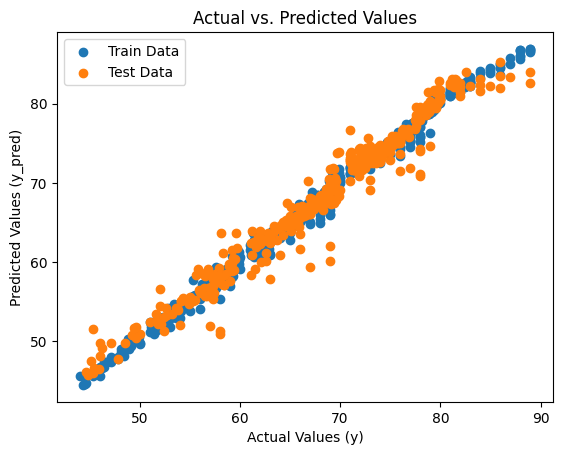

In [13]:
plt.scatter(y_train, y_pred_train, label='Train Data')
plt.scatter(y_test, y_pred_test, label='Test Data')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

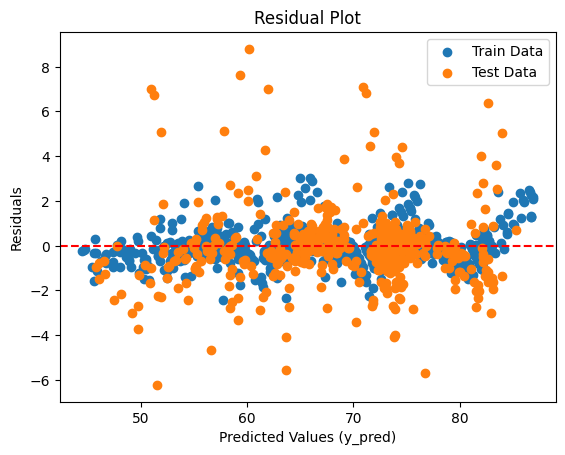

In [14]:
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

plt.scatter(y_pred_train, train_residuals, label='Train Data')
plt.scatter(y_pred_test, test_residuals, label='Test Data')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

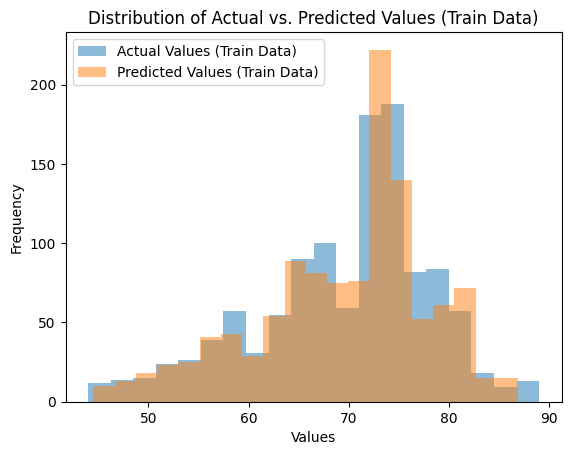

In [15]:
plt.hist(y_train, alpha=0.5, label='Actual Values (Train Data)', bins=20)
plt.hist(y_pred_train, alpha=0.5, label='Predicted Values (Train Data)', bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values (Train Data)')
plt.legend()
plt.show()

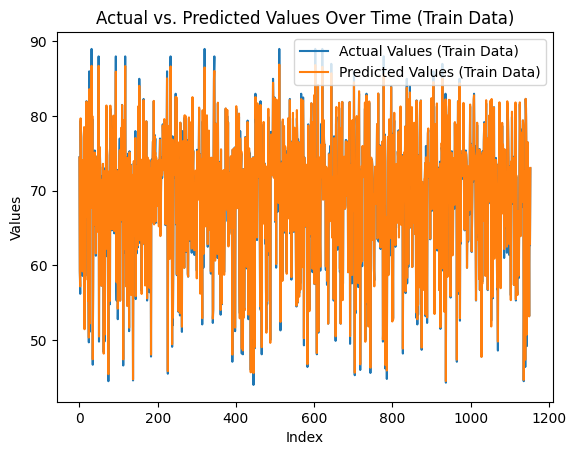

In [16]:
plt.plot(range(len(y_train)), y_train, label='Actual Values (Train Data)')
plt.plot(range(len(y_train)), y_pred_train, label='Predicted Values (Train Data)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values Over Time (Train Data)')
plt.legend()
plt.show()